## Code pour proposition de projet MLSP
* Prise de connaissance des données
* Compréhension des variables
* Graphs des inputs/outputs des modèles

In [1]:
### Packages de base
import numpy as np
import pandas as pd

In [ ]:
### Importer les données
from datasets import load_dataset

## Load User Reviews - Test avec All_Beauty # Handmade_Products
dataset_reviews = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Video_Games", split="full", trust_remote_code=True)

## Load Item Metadata - Test avec All_Beauty
dataset_items = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Video_Games", split="full", trust_remote_code=True)

Video_Games.jsonl:   0%|          | 0.00/2.68G [00:00<?, ?B/s]

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\natha\.cache\huggingface\hub\datasets--McAuley-Lab--Amazon-Reviews-2023. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Generating full split: 0 examples [00:00, ? examples/s]

meta_Video_Games.jsonl:   0%|          | 0.00/437M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

### Huggingface datasets
Quand on importe les données de huggingface elles sont sous format de **dataset**. Un dataset est un conteneur python, où chaque ligne correspond à un dictionnaire. Les clés (keys) du dictionnaire correspondent aux colonnes du dataset et les valeurs (values), aux valeurs de chaque colonnes.

### Reviews

In [4]:
# Review informations
print(dataset_reviews)
dataset_reviews.features

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 4624615
})


{'rating': Value(dtype='float64', id=None),
 'title': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'images': [{'attachment_type': Value(dtype='string', id=None),
   'large_image_url': Value(dtype='string', id=None),
   'medium_image_url': Value(dtype='string', id=None),
   'small_image_url': Value(dtype='string', id=None)}],
 'asin': Value(dtype='string', id=None),
 'parent_asin': Value(dtype='string', id=None),
 'user_id': Value(dtype='string', id=None),
 'timestamp': Value(dtype='int64', id=None),
 'helpful_vote': Value(dtype='int64', id=None),
 'verified_purchase': Value(dtype='bool', id=None)}

In [5]:
# Example of review output
print(dataset_reviews[0])

{'rating': 4.0, 'title': 'It’s pretty sexual. Not my fav', 'text': 'I’m playing on ps5 and it’s interesting.  It’s unique, massive, and has a neat story.  People are freaking out angry about this game.  I don’t think it’s a top 10 game but it’s definitely a good game on ps5 (played at launch).', 'images': [], 'asin': 'B07DJWBYKP', 'parent_asin': 'B07DK1H3H5', 'user_id': 'AGCI7FAH4GL5FI65HYLKWTMFZ2CQ', 'timestamp': 1608186804795, 'helpful_vote': 0, 'verified_purchase': True}


In [6]:
# Ratings distribution
dataset_reviews['rating']

[4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.0,
 5.0,
 5.0,
 5.0,
 1.0,
 4.0,
 1.0,
 4.0,
 5.0,
 1.0,
 4.0,
 5.0,
 4.0,
 1.0,
 1.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 1.0,
 5.0,
 1.0,
 5.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 1.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 2.0,
 5.0,
 4.0,
 1.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 4.0,
 1.0,
 1.0,
 2.0,
 5.0,
 4.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 4.0,
 4.0,
 3.0,
 5.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 3.0,
 4.0,
 3.0,
 5.0,
 4.0,
 5.0,
 4.0,
 4.0,
 5.0,
 4.0,
 5.0,
 5.0,
 3.0,
 4.0,
 4.0,
 4.0,
 2.0,
 4.0,
 5.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 4.0,
 3.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 4.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.0,
 1.0,
 4.0,
 4.0,
 1.0,
 1.0,
 4.0,
 1.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 4.0,
 4.0,
 2.0,
 4.0,
 4.0,
 4.0,
 5.0,
 3.0,
 2.0,
 5.0

In [7]:
## Convert to df (plus à l'aise pour certaines manip et EDA)
df_reviews = pd.DataFrame(dataset_reviews)

In [8]:
print(df_reviews['rating'].count())
print(df_reviews['rating'].value_counts())
print(df_reviews['rating'].value_counts() / df_reviews['rating'].count())

4624615
5.0    2827881
4.0     617251
1.0     589519
3.0     340086
2.0     249878
Name: rating, dtype: int64
5.0    0.611485
4.0    0.133471
1.0    0.127474
3.0    0.073538
2.0    0.054032
Name: rating, dtype: float64


In [16]:
ratings

0         5
1         4
2         5
3         1
4         5
         ..
701523    4
701524    1
701525    5
701526    5
701527    4
Name: rating, Length: 701528, dtype: int32

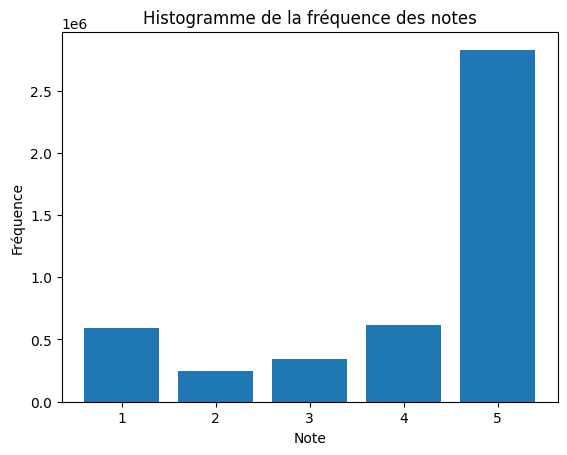

In [9]:
import matplotlib.pyplot as plt
import numpy as np

ratings = df_reviews['rating'].astype(int).to_numpy()
unique, counts = np.unique(ratings, return_counts=True)

plt.bar(unique, counts, label=counts)
plt.xlabel("Note")
plt.ylabel("Fréquence")
plt.title("Histogramme de la fréquence des notes")
plt.show()

In [74]:
np.random.seed(123)
idx = np.random.randint(0, df_reviews.shape[0], size=3)


In [10]:
df_reviews.iloc[49534][:]

rating                                                             1.0
title                          3hrs of use on the first day then died.
text                 I received it at 10am today. Used it for 3 hou...
images                                                              []
asin                                                        B01LE63D34
parent_asin                                                 B01LE63D34
user_id                                   AH5NS6RJXNNJTYJJQKWIDBU2SWAQ
timestamp                                                1516745135750
helpful_vote                                                         0
verified_purchase                                                 True
Name: 49534, dtype: object

In [18]:
df[df['parent_asin'] == 'B01LE63D34']

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
118587,Computers,"Criacr Gaming Mouse Wired, 9200 DPI High Preci...",4.0,258,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Criacr,"[Video Games, PC, Accessories, Gaming Mice]","{""Brand"": ""Criacr"", ""Item model number"": ""LYSB...",B01LE63D34,None,None,None


### Items

In [15]:
# Item informations
print(dataset_items)
dataset_items.features

Dataset({
    features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
    num_rows: 137269
})


{'main_category': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None),
 'average_rating': Value(dtype='float64', id=None),
 'rating_number': Value(dtype='int64', id=None),
 'features': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'description': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'price': Value(dtype='string', id=None),
 'images': Sequence(feature={'hi_res': Value(dtype='string', id=None), 'large': Value(dtype='string', id=None), 'thumb': Value(dtype='string', id=None), 'variant': Value(dtype='string', id=None)}, length=-1, id=None),
 'videos': Sequence(feature={'title': Value(dtype='string', id=None), 'url': Value(dtype='string', id=None), 'user_id': Value(dtype='string', id=None)}, length=-1, id=None),
 'store': Value(dtype='string', id=None),
 'categories': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'details': Value(dtype='string', id=None),
 'parent_asin': Value(dtype='stri

In [16]:
# Example item output
print(dataset_items[1111])

{'main_category': 'Video Games', 'title': 'The Evil Within - Xbox One', 'average_rating': 4.6, 'rating_number': 890, 'features': ["Pure Survival Horror Returns - Shinji Mikami, the father of survival horror, is back to direct a chilling new game wrapped in haunting narrative; Tension and anxiety heighten dramatically as you explore the game's tortured world", 'Brutal Traps and Twisted Creatures - Face unthinkable horrors and cruel traps as you struggle to survive against overwhelming odds; Turn evil against itself by using the same diabolical devices against overwhelming deadly creatures', 'Unknown Threats in an Uncertain World - Mysterious and wicked fears loom ahead in a world that warps and twists around you', 'The New Face of Horror - Highly-crafted environments, horrifying anxiety, and an intricate story weave together to create an immersive world that will bring players to the height of tension'], 'description': ['view larger', 'The Evil Within', 'Developed by Shinji Mikami -- cr

In [17]:
print(dataset_items['price'])
dataset_items['price'][dataset_items['price'] == 'None']

['None', 'None', '58.0', '37.42', 'None', 'None', '33.98', '17.59', 'None', 'None', '20.95', '4.97', '46.99', '13.99', '182.93', '29.95', 'None', '13.73', 'None', '9.99', '3.95', '15.99', 'None', '109.0', 'None', '15.6', '16.88', 'None', 'None', '4.99', '12.99', 'None', '40.85', '24.5', 'None', 'None', 'None', '24.99', '19.99', '1.99', 'None', '16.99', 'None', 'None', 'None', '8.0', 'None', '32.95', 'None', 'None', '6.99', '39.99', '8.99', '9.99', 'None', '27.43', '3.99', '14.99', '13.08', '51.95', 'None', 'None', '37.99', '185.0', 'None', '19.43', '39.99', '37.99', 'None', 'None', 'None', '13.92', '16.99', 'None', 'None', 'None', '5.86', 'None', 'None', '19.99', '17.99', 'None', '15.99', '89.99', 'None', '8.95', '11.59', '6.99', '23.93', 'None', 'None', '15.66', 'None', '19.99', 'None', '7.79', '9.99', 'None', 'None', 'None', 'None', 'None', '9.99', 'None', 'None', 'None', '43.89', '21.94', 'None', 'None', '9.99', '35.99', 'None', 'None', '50.0', 'None', '17.99', '14.99', '49.99', '49

'None'

In [13]:
## Convert to df (plus à l'aise pour certaines manip et EDA)
df = pd.DataFrame(dataset_items)

In [40]:
len(df['price'][df['price'] != 'None']) / len(df['price']) # % des produits qui ont un prix

0.1572430944133582